<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/SkimLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Data

In [8]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.


#Explore and preprocess the data

In [9]:
!ls pubmed-rct

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [10]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [11]:
def read_txt(dir):
  with open(dir, 'r') as f:
    return f.readlines()

###Setup train_dir, test_dir

In [12]:
train_dir = 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt'
val_dir = 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt'
test_dir = 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt'

In [13]:
data_train = read_txt('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')

In [14]:
data_train[:14]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [15]:
data_train[-10:]

['METHODS\tEligible patients who underwent PCI were randomly assigned to atorvastatin alone or atorvastatin plus ezetimibe ( @ mg ) daily .\n',
 'METHODS\tAtorvastatin was uptitrated with a treatment goal of low-density lipoprotein cholesterol ( LDL-C ) < @ mg/dl .\n',
 'METHODS\tSerial volumetric intravascular ultrasound was performed at baseline and again at @ to @ months to quantify the coronary plaque response in @ patients .\n',
 'RESULTS\tThe combination of atorvastatin/ezetimibe resulted in lower levels of LDL-C than atorvastatin monotherapy ( @ @ mg/dl vs. @ @ mg/dl ; p < @ ) .\n',
 'RESULTS\tFor the absolute change in percent atheroma volume ( PAV ) , themean difference between the @ groups ( -@ % ; @ % confidence interval -LSB- CI -RSB- : -@ % to @ % ) did not exceedthe pre-defined noninferiority margin of @ % , but the absolute change in PAV did show superiority for the dual lipid-lowering strategy ( -@ % ; @ % CI : -@ % to -@ % vs. -@ % ; @ % CI : -@ % to @ % with atorvasta

###Put data in a more readable form(Pandas DataFrame)

In [16]:
def sort_article(data):
  data_list = []
  article = []
  for line in data:
    article.append(line)
    if line.isspace():
      data_list.append(article)
      article = []
  return data_list

In [17]:
def preprocess_to_dic_list(data_dir):
  data = read_txt(data_dir)
  data_list = sort_article(data)

  data_dir_list = []
  for article in data_list:
    for i, line in enumerate(article[1:len(article)-1]):
      ele = {}
      line_split = line.split('\t')
      ele['target'] = line_split[0]
      ele['text'] = line_split[1].strip()
      ele['total_lines'] = len(article)-3
      ele['line_number'] = i
      data_dir_list.append(ele)
  return data_dir_list

In [18]:
%%time
train_list = preprocess_to_dic_list(train_dir)
val_list = preprocess_to_dic_list(val_dir)
test_list = preprocess_to_dic_list(test_dir)

CPU times: user 586 ms, sys: 150 ms, total: 735 ms
Wall time: 776 ms


In [19]:
train_list[:15]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'Secondary outcome measures include

In [20]:
import pandas as pd

train_df = pd.DataFrame(train_list)
val_df = pd.DataFrame(val_list)
test_df = pd.DataFrame(test_list)
train_df

,target,text,total_lines,line_number
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11,0
1,METHODS,A total of @ patients with primary knee OA wer...,11,1
2,METHODS,Outcome measures included pain reduction and i...,11,2
3,METHODS,Pain was assessed using the visual analog pain...,11,3
4,METHODS,Secondary outcome measures included the Wester...,11,4
...,...,...,...,...
180035,RESULTS,For the absolute change in percent atheroma vo...,11,7
180036,RESULTS,"For PAV , a significantly greater percentage o...",11,8
180037,RESULTS,Both strategies had acceptable side effect pro...,11,9
180038,CONCLUSIONS,"Compared with standard statin monotherapy , th...",11,10


(array([13839.,     0., 59353.,     0.,     0., 57953.,     0., 27168.,
            0., 21727.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

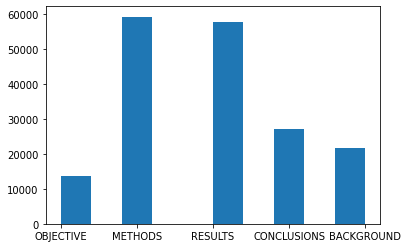

In [21]:
import matplotlib.pyplot as plt

plt.hist(train_df['target'])

(array([ 1393., 23102., 67507., 40551., 32807., 11026.,  2051.,  1223.,
          291.,    89.]),
 array([ 3. ,  5.7,  8.4, 11.1, 13.8, 16.5, 19.2, 21.9, 24.6, 27.3, 30. ]),
 <a list of 10 Patch objects>)

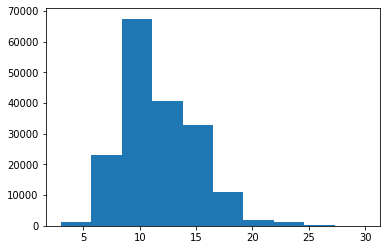

In [22]:
plt.hist(train_df['total_lines'])

###Setup training set and testing set

In [23]:
X_train = train_df['text'].to_list()
X_val = val_df['text'].to_list()
X_test = test_df['text'].to_list()

###Label encode the target

In [24]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train_label_encoded = le.fit_transform(train_df['target'].to_list())
val_label_encoded = le.fit_transform(val_df['target'].to_list())
test_label_encoded = le.fit_transform(test_df['target'].to_list())

(array([21727.,     0., 27168.,     0.,     0., 59353.,     0., 13839.,
            0., 57953.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

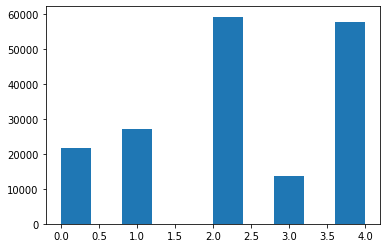

In [25]:
plt.hist(train_label_encoded)

###One hot encode the target

In [26]:
one_hot_encoder = preprocessing.OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

In [27]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

#Setup evaluation method

In [28]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

def evaluate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_result = {'model_accuracy': model_accuracy,
                  'model_precision': model_precision,
                  'model_recall': model_recall,
                  'model_fscore': model_fscore}
  return model_result

#Model 0: TFIDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(X_train, train_label_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [30]:
y_pred = model_0.predict(X_val)

In [31]:
evaluate_results(val_label_encoded, y_pred)

{'model_accuracy': 0.7218323844829869,
 'model_fscore': 0.6989250353450294,
 'model_precision': 0.7186466952323352,
 'model_recall': 0.7218323844829869}

#Set up text vectorization and Embedding for deep model

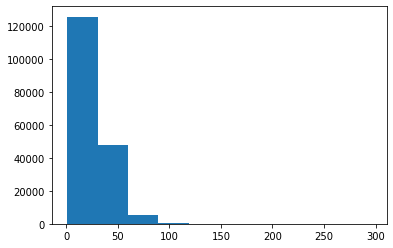

In [32]:
# Hist the length of sentences in training set
import numpy as np

sentences_length = [len(sentences.split()) for sentences in train_df['text'].to_list()]
plt.hist(sentences_length)
output_sen_len = int(np.percentile(sentences_length, 95))

In [33]:
import tensorflow as tf
from tensorflow.keras import layers

max_tokens = 68000
text_vectorizer = layers.TextVectorization(max_tokens=max_tokens,
                                           output_sequence_length=output_sen_len)
text_vectorizer.adapt(X_train)

In [34]:
text_vectorizer(X_train[0])

<tf.Tensor: shape=(55,), dtype=int64, numpy=
array([   6,  331,    2,   79,    4,   53,    4,  161, 1127,  217, 2535,
          5,  557,   65, 1584,    3,  670, 5559,  636,    5,    2,  654,
       1137,    3,  180,    2,   70,  495,   36,  781,   15,   53,    5,
        350,  266,    7,  362,    6,  289,  517, 1430, 1743,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])>

In [35]:
X_train[0]

'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .'

In [36]:
text_vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'the', 'and', 'of']

In [37]:
text_vectorizer.get_vocabulary()[-5:]

['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']

In [38]:
text_embedding = layers.Embedding(input_dim=len(text_vectorizer.get_vocabulary()),
                                  output_dim=128,
                                  mask_zero=True)

In [39]:
text_embedding(text_vectorizer(X_train[0]))

<tf.Tensor: shape=(55, 128), dtype=float32, numpy=
array([[-0.01383573,  0.04672576, -0.04636563, ...,  0.027422  ,
         0.00624744,  0.04546518],
       [ 0.01047369,  0.02618051, -0.04702785, ..., -0.045937  ,
        -0.0259673 , -0.00536559],
       [ 0.03354095, -0.01235038, -0.00679634, ..., -0.01203375,
        -0.03823432, -0.01016034],
       ...,
       [ 0.02708877, -0.03547185, -0.00090152, ..., -0.01801368,
        -0.00677327,  0.01421756],
       [ 0.02708877, -0.03547185, -0.00090152, ..., -0.01801368,
        -0.00677327,  0.01421756],
       [ 0.02708877, -0.03547185, -0.00090152, ..., -0.01801368,
        -0.00677327,  0.01421756]], dtype=float32)>

#Create dataset pipline

In [40]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_labels_one_hot))

In [41]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [42]:
len(train_dataset)

5627

#Model 1 Conv1D

In [43]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = text_embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, padding='same', activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(len(one_hot_encoder.get_feature_names()), activation='softmax')(x)

model_1 = tf.keras.Model(inputs, outputs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [45]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [46]:
history_1 = model_1.fit(train_dataset,
                        epochs=3,
                        steps_per_epoch=int(0.1*len(train_dataset)),
                        validation_data=val_dataset,
                        validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 92s 162ms/step - loss: 0.9157 - accuracy: 0.6401 - val_loss: 0.6897 - val_accuracy: 0.7397
Epoch 2/3
562/562 [==============================] - 103s 183ms/step - loss: 0.6608 - accuracy: 0.7549 - val_loss: 0.6343 - val_accuracy: 0.7693
Epoch 3/3
562/562 [==============================] - 93s 165ms/step - loss: 0.6195 - accuracy: 0.7736 - val_loss: 0.5966 - val_accuracy: 0.7859


In [47]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 8s 9ms/step - loss: 0.5980 - accuracy: 0.7872


[0.5979688763618469, 0.7872368693351746]

In [48]:
model_1_pred_pro = model_1.predict(X_val)
model_1_preds = tf.argmax(model_1_pred_pro, axis=1)

In [49]:
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [50]:
evaluate_results(val_label_encoded, model_1_preds)

{'model_accuracy': 0.7872368595260162,
 'model_fscore': 0.7847924822029362,
 'model_precision': 0.7838112161337385,
 'model_recall': 0.7872368595260162}

#Model 2 Feature extraction with pretrained embeddings

In [55]:
import tensorflow_hub as hub

embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [58]:
inputs = layers.Input(shape=[], dtype='string')
x = embedding_layer(inputs)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(5, activation='softmax')(x)

model_2 = tf.keras.Model(inputs, outputs)

In [59]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [61]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [62]:
history_2 = model_2.fit(train_dataset,
                        epochs=3,
                        steps_per_epoch=int(0.1*len(train_dataset)),
                        validation_data=val_dataset,
                        validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 19s 20ms/step - loss: 0.9162 - accuracy: 0.6542 - val_loss: 0.7939 - val_accuracy: 0.6915
Epoch 2/3
562/562 [==============================] - 11s 20ms/step - loss: 0.7665 - accuracy: 0.7032 - val_loss: 0.7528 - val_accuracy: 0.7068
Epoch 3/3
562/562 [==============================] - 13s 22ms/step - loss: 0.7497 - accuracy: 0.7139 - val_loss: 0.7359 - val_accuracy: 0.7154


In [63]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 18s 19ms/step - loss: 0.7389 - accuracy: 0.7151


[0.7388923168182373, 0.7150800824165344]

In [64]:
model_2_pred_pros = model_2.predict(X_val)

In [67]:
model_2_pred = tf.argmax(model_2_pred_pros, axis=1)

In [69]:
evaluate_results(val_label_encoded, model_2_pred)

{'model_accuracy': 0.7150801006222693,
 'model_fscore': 0.7122831854447569,
 'model_precision': 0.7156191593953446,
 'model_recall': 0.7150801006222693}

#Model 3 Character based Embedding

In [71]:
X_train[0]

'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .'

In [80]:
def split_char(text):
  return ' '.join([char for word in text.split() for char in word])

In [83]:
X_train_char = [split_char(row) for row in X_train]
X_val_char = [split_char(row) for row in X_val]

In [82]:
X_train_char[:5]

['T o i n v e s t i g a t e t h e e f f i c a c y o f @ w e e k s o f d a i l y l o w - d o s e o r a l p r e d n i s o l o n e i n i m p r o v i n g p a i n , m o b i l i t y , a n d s y s t e m i c l o w - g r a d e i n f l a m m a t i o n i n t h e s h o r t t e r m a n d w h e t h e r t h e e f f e c t w o u l d b e s u s t a i n e d a t @ w e e k s i n o l d e r a d u l t s w i t h m o d e r a t e t o s e v e r e k n e e o s t e o a r t h r i t i s ( O A ) .',
 'A t o t a l o f @ p a t i e n t s w i t h p r i m a r y k n e e O A w e r e r a n d o m i z e d @ : @ ; @ r e c e i v e d @ m g / d a y o f p r e d n i s o l o n e a n d @ r e c e i v e d p l a c e b o f o r @ w e e k s .',
 'O u t c o m e m e a s u r e s i n c l u d e d p a i n r e d u c t i o n a n d i m p r o v e m e n t i n f u n c t i o n s c o r e s a n d s y s t e m i c i n f l a m m a t i o n m a r k e r s .',
 'P a i n w a s a s s e s s e d u s i n g t h e v i s u a l a n a l o g p a i n s c a l e ( @ - @ m m ) .'

In [86]:
train_dataset_char = tf.data.Dataset.from_tensor_slices((X_train_char, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_char = tf.data.Dataset.from_tensor_slices((X_val_char, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

(array([1.9017e+04, 6.5217e+04, 5.6595e+04, 2.5532e+04, 9.2030e+03,
        2.8660e+03, 9.9700e+02, 3.3800e+02, 1.5000e+02, 5.6000e+01,
        3.1000e+01, 1.8000e+01, 9.0000e+00, 5.0000e+00, 0.0000e+00,
        1.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000e+00, 1.100e+02, 2.190e+02, 3.280e+02, 4.370e+02, 5.460e+02,
        6.550e+02, 7.640e+02, 8.730e+02, 9.820e+02, 1.091e+03, 1.200e+03,
        1.309e+03, 1.418e+03, 1.527e+03, 1.636e+03, 1.745e+03, 1.854e+03,
        1.963e+03, 2.072e+03, 2.181e+03]),
 <a list of 20 Patch objects>)

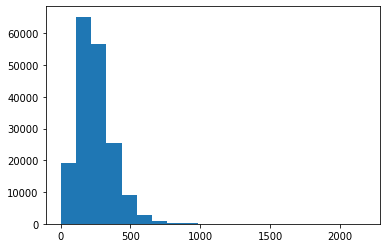

In [90]:
plt.hist([len(text) for text in X_train_char], bins=20)

In [100]:
np.mean([len(text) for text in X_train_char])

247.05597644967784

In [95]:
output_sen_len_char = int(np.percentile([len(text) for text in X_train_char], 95))
output_sen_len_char

477

In [96]:
text_vectorizer_char = layers.TextVectorization(max_tokens=50,
                                                output_sequence_length=output_sen_len_char)
text_vectorizer_char.adapt(X_train_char)

In [97]:
text_vectorizer_char.get_vocabulary()[:5]

['', '[UNK]', 'e', 't', 'i']

In [98]:
text_vectorizer_char.get_vocabulary()[-5:]

['k', 'x', 'z', 'q', 'j']

In [101]:
text_embedding_char = layers.Embedding(input_dim=len(text_vectorizer_char.get_vocabulary()),
                                       output_dim=25,
                                       mask_zero=False)

In [103]:
NUM_CLASSES = len(le.classes_)
NUM_CLASSES

5

In [104]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer_char(inputs)
x = text_embedding_char(x)
x = layers.Conv1D(filters=64, kernel_size=5, padding='same', activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_3 = tf.keras.Model(inputs, outputs)

In [105]:
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [106]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 477)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 477, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 477, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 5)                 325 

In [107]:
history_3 = model_3.fit(train_dataset_char,
                        epochs=3,
                        steps_per_epoch=int(0.1*len(train_dataset_char)),
                        validation_data=val_dataset_char,
                        validation_steps=int(0.1*len(val_dataset_char)))

Epoch 1/3
562/562 [==============================] - 50s 86ms/step - loss: 1.2749 - accuracy: 0.4726 - val_loss: 1.0627 - val_accuracy: 0.5725
Epoch 2/3
562/562 [==============================] - 61s 109ms/step - loss: 1.0214 - accuracy: 0.5895 - val_loss: 0.9590 - val_accuracy: 0.6217
Epoch 3/3
562/562 [==============================] - 67s 120ms/step - loss: 0.9429 - accuracy: 0.6272 - val_loss: 0.8845 - val_accuracy: 0.6586


In [108]:
model_3.evaluate(val_dataset_char)

945/945 [==============================] - 30s 32ms/step - loss: 0.9061 - accuracy: 0.6486


[0.9060572981834412, 0.6485833525657654]

In [109]:
model_3_pred_pros = model_3.predict(X_val_char)
model_3_pred = tf.argmax(model_3_pred_pros, axis=1)
evaluate_results(val_label_encoded, model_3_pred)

{'model_accuracy': 0.6485833443664769,
 'model_fscore': 0.6348769753425683,
 'model_precision': 0.638729911376812,
 'model_recall': 0.6485833443664769}

#Model 4 Combine pretrained token embedding and character embedding 

In [111]:
train_data_combined = tf.data.Dataset.from_tensor_slices((X_train, X_train_char))
train_label_combined = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_dataset_combined = tf.data.Dataset.zip((train_data_combined, train_label_combined)).batch(32).prefetch(tf.data.AUTOTUNE)

val_data_combined = tf.data.Dataset.from_tensor_slices((X_val, X_val_char))
val_label_combined = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_dataset_combined = tf.data.Dataset.zip((val_data_combined, val_label_combined)).batch(32).prefetch(tf.data.AUTOTUNE)

In [114]:
token_inputs = layers.Input(shape=[], dtype='string', name='token_inputs')
token_embedding = embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation='relu')(token_embedding)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = layers.Input(shape=(1,), dtype='string', name='char_inputs')
char_vector = text_vectorizer_char(char_inputs)
char_embed = text_embedding_char(char_vector)
char_bi_LSTM = layers.Bidirectional(layers.LSTM(25))(char_embed)
char_model = tf.keras.Model(char_inputs, char_bi_LSTM)

token_char_concat = layers.Concatenate(name='token_char_concat')([token_model.output, char_model.output])

combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation='relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(final_dropout)

model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name='model_4_token_char_embedding')

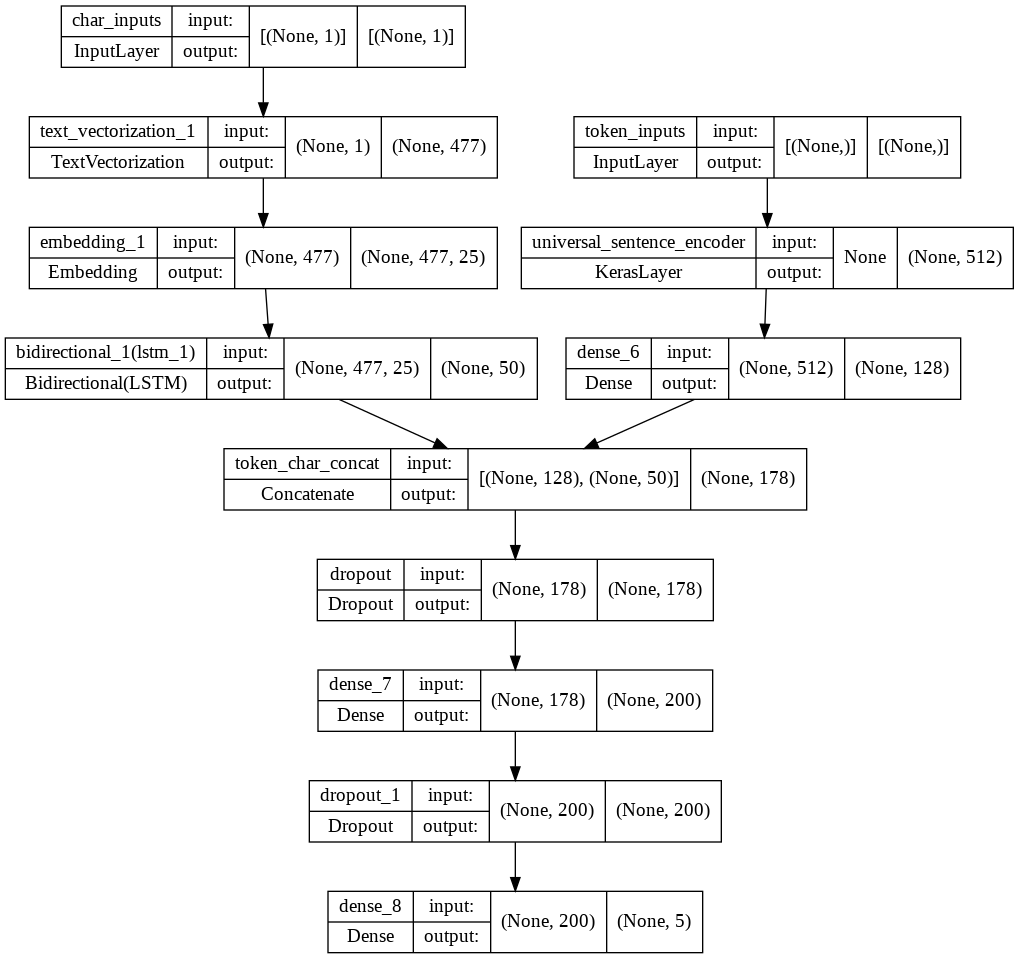

In [116]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [117]:
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [118]:
history_4 = model_4.fit(train_dataset_combined,
                        epochs=3,
                        steps_per_epoch=int(0.1*len(train_dataset_combined)),
                        validation_data=val_dataset_combined,
                        validation_steps=int(0.1*len(val_dataset_combined)))

Epoch 1/3
562/562 [==============================] - 366s 634ms/step - loss: 0.9712 - accuracy: 0.6114 - val_loss: 0.7840 - val_accuracy: 0.6985
Epoch 2/3
562/562 [==============================] - 358s 636ms/step - loss: 0.7949 - accuracy: 0.6908 - val_loss: 0.7138 - val_accuracy: 0.7277
Epoch 3/3
562/562 [==============================] - 221s 394ms/step - loss: 0.7670 - accuracy: 0.7077 - val_loss: 0.6938 - val_accuracy: 0.7357


In [119]:
model_4.evaluate(val_dataset_combined)

945/945 [==============================] - 75s 80ms/step - loss: 0.6960 - accuracy: 0.7347


[0.6960012316703796, 0.7347411513328552]

In [120]:
model_4_pred_pros = model_4.predict(val_dataset_combined)
model_4_pred = tf.argmax(model_4_pred_pros, axis=1)
evaluate_results(val_label_encoded, model_4_pred)

{'model_accuracy': 0.7347411624520058,
 'model_fscore': 0.7323241962983584,
 'model_precision': 0.7351504201342056,
 'model_recall': 0.7347411624520058}